# Real Life Example ARIMA(p, d, q)

Daily female birth in California in 1959 from the [Time Series Data Library](https://datamarket.com/data/list/?q=provider%3Atsdl)

**Goal:** 

- Fit a time series model to the data
- Evaluate and compare different models
- Use Ljung-Box Q statistics to test autocorrelations  

**Useful Check box items**  
- Trend suggests differencing. First order difference means d = 1
- Non-constant variance suggest transformations
- Use ACF to estimate order of Moving Average part (q)
- Use PACF to estimate order of Auto Regressive part (p)
- Use Arkaine Information Criterion (AIC) or Sum of Square Error (SSE) to compare models. Small AIC is good!
- Use Ljung-Box test to test autocorrelation coefficients

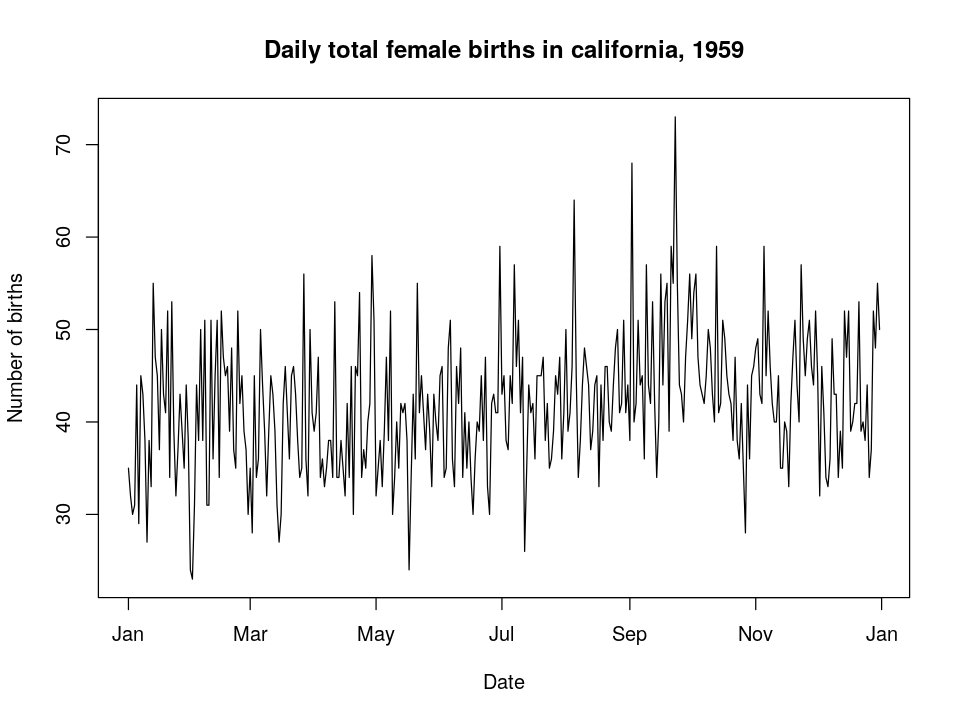

In [1]:
# read data to R variable
birth.data<-read.csv("daily-total-female-births-in-cal.csv")

# pull out number of births column
number_of_births<-birth.data$DailyBirth

# use date format for dates
birth.data$Date <- as.Date(birth.data$Date, "%Y-%m-%d")

# plot the series
options(repr.plot.width=8, repr.plot.height=6)
plot(number_of_births ~ birth.data$Date, type = "l",
     main='Daily total female births in california, 1959',
     ylab = 'Number of births', xlab='Date')

- The is a bit of trend between May and September. We may need to take the difference. But first let's test autocorrelations.

#### Test for correlations

In [2]:
# Test for correlation
Box.test(number_of_births, lag = log(length(number_of_births)))


	Box-Pierce test

data:  number_of_births
X-squared = 36.391, df = 5.8999, p-value = 2.088e-06


**Observations:**  
- The p-value is very small, hence we can reject the null hypothesis that all autocorrelations coefficients are 0


	Box-Pierce test

data:  diff(number_of_births)
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


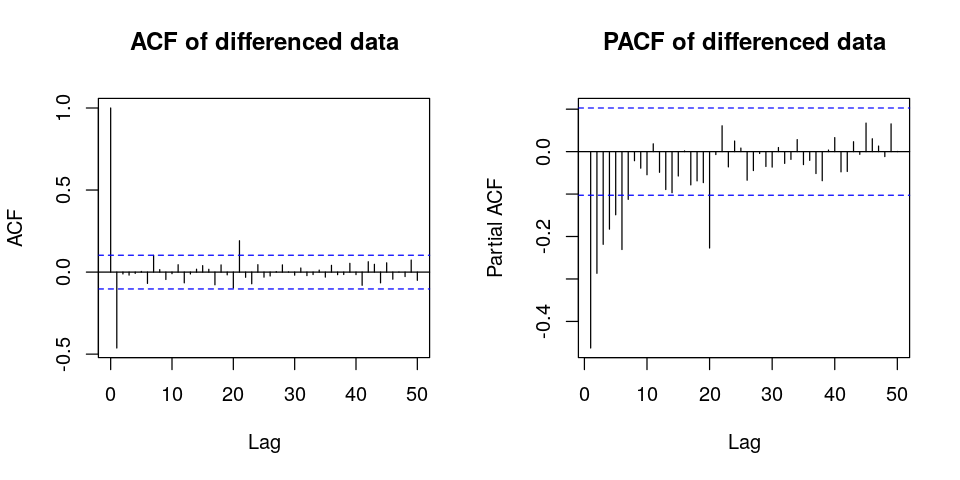

In [3]:
# plot the differenced series
Box.test(diff(number_of_births), lag = log(length(diff(number_of_births))))


# acf and pacf of the differenced data
par(mfcol = c(1,2))
options(repr.plot.width=8, repr.plot.height=4)
acf(diff(number_of_births), main='ACF of differenced data', 50)
pacf(diff(number_of_births), main='PACF of differenced data', 50)

- Even after differencing, the p-value of the Ljung-Box test is small, suggesting significant autocorrelations. 
- The ACF has lag 1 and lag 20 which are significant, it's not clear what to conclude from that
- The PACF has 7 significant values and again one at lag 20
- Ignoring lag 20 we may think of ARIMA(p=7, d=1, q=1)

In [4]:
# Fit various ARIMA models
model1<-arima(number_of_births, order=c(0,1,1))
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-arima(number_of_births, order=c(0,1,2))
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

model3<-arima(number_of_births, order=c(7,1,1))
SSE3<-sum(model3$residuals^2)
model3.test<-Box.test(model3$residuals, lag = log(length(model3$residuals)))

model4<-arima(number_of_births, order=c(7,1,2))
SSE4<-sum(model4$residuals^2)
model4.test<-Box.test(model4$residuals, lag = log(length(model4$residuals)))

df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value), c(model3$aic, SSE3, model3.test$p.value),
               c(model4$aic, SSE4, model4.test$p.value))
colnames(df)<-c('Arima(0,1,1)','Arima(0,1,2)', 'Arima(7,1,1)', 'Arima(7,1,2)')



format(df, scientific=FALSE)

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
AIC,2462.2207021,2459.5705306,2464.8827225,2466.6664136
SSE,18148.4561632,17914.6513437,17584.3902548,17574.0578107
p-value,0.5333604,0.9859227,0.9999899,0.9999929


initial  value 2.216721 
iter   2 value 2.047518
iter   3 value 1.974780
iter   4 value 1.966955
iter   5 value 1.958906
iter   6 value 1.952299
iter   7 value 1.951439
iter   8 value 1.950801
iter   9 value 1.950797
iter  10 value 1.950650
iter  11 value 1.950646
iter  12 value 1.950638
iter  13 value 1.950635
iter  13 value 1.950635
iter  13 value 1.950635
final  value 1.950635 
converged
initial  value 1.950708 
iter   2 value 1.950564
iter   3 value 1.950290
iter   4 value 1.950196
iter   5 value 1.950185
iter   6 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
final  value 1.950185 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, optim.control = list(trace = trc, REPORT = 1, 
    reltol = tol))

Coefficients:
          ma1      ma2  constant
      -0.8511  -0.1113     0.015
s.e.   0.0496   0.0502     0.015

sigma^2 estimated as 49.08:  log likelihood = -1226.36,  aic = 2460.72

$degrees_of_freedom
[1] 361

$ttable
         Estimate     SE  t.value p.value
ma1       -0.8511 0.0496 -17.1448  0.0000
ma2       -0.1113 0.0502  -2.2164  0.0273
constant   0.0150 0.0150   1.0007  0.3176

$AIC
[1] 4.909895

$AICc
[1] 4.915679

$BIC
[1] 3.941949


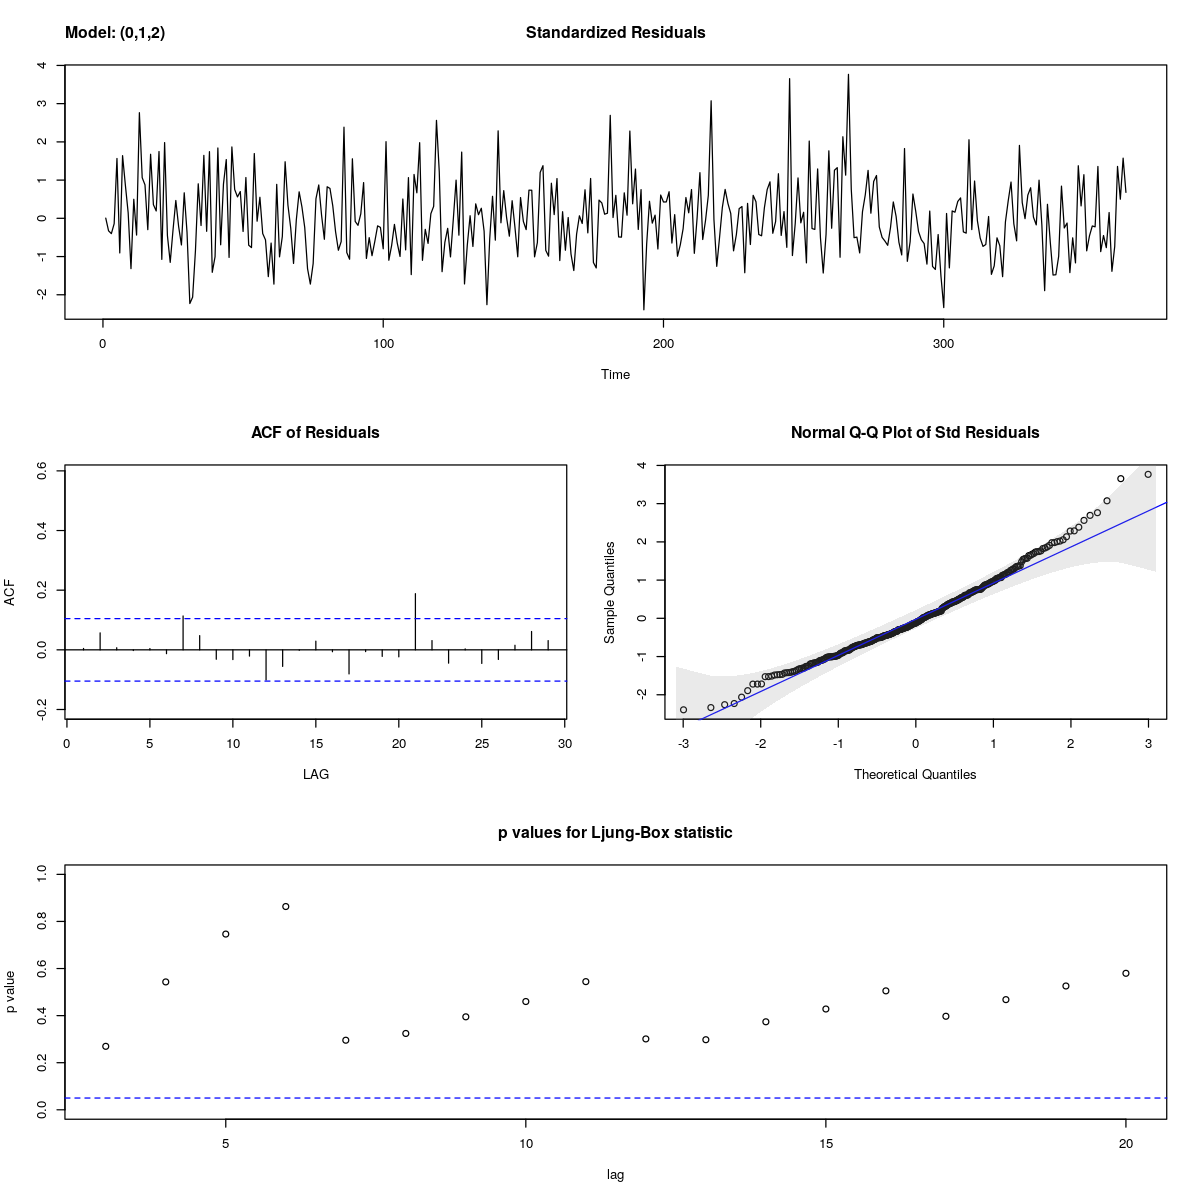

In [5]:
library(astsa)

par(mfcol = c(1,1))
options(repr.plot.width=10, repr.plot.height=10)

#sarima stand for seasonal arima. p=0, d=1, q=2, 0,0,0 for seasonal part
sarima(number_of_births, 0,1,2,0,0,0)

Here i a summary of the coefficients obtained:
```
         Estimate     SE  t.value p.value    
ma1       -0.8511 0.0496 -17.1448  0.0000   
ma2       -0.1113 0.0502  -2.2164  0.0273   
constant   0.0150 0.0150   1.0007  0.3176   
```

- since the model is ARIMA(0,1,2), there is no AR coefficient. 
- $\theta_1 = -0.8511 +/- 0.049$ is significant at $\alpha = 0.05$, since the p-value is less than 0.05
- $\theta_2 = -0.1113 +/- 0.050$ is significant at $\alpha = 0.05$, since the p-value is less than 0.05
- $\theta_0 = 0.0150  +/- 0.015$ is not significant, so we can ignore it in the final model 
- $\sigma^2$ estimated as 49.08

so we can write the final model as 

$$(1-B)X_t = Z_t - 0.8511Z_{t-1} - 0.1113Z_{t-2}$$

with $Z_t$~$N(0, \sigma^2)$